In [1]:
#read the elastic cross section info from /var/phy/project/mepg/shuoj/elastic_xs/newep_ on Duke HPC 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rc, rcParams
rc('text', usetex=True)
rc('axes', linewidth=1.5)
rc('axes', labelweight='bold')
rc('axes',labelsize=16)
rc('axes.formatter',min_exponent=0)
rc('font', weight='bold')
rc('font', size=14)
rc('xtick',direction='in')
rc('ytick',direction='in')
rc('xtick.major',width=1)
rc('ytick.major',width=1)
rc('xtick.major',size=6)
rc('ytick.major',size=6)
rc('xtick.minor',visible=True)
rc('ytick.minor',visible=True)
rc('xtick.minor',size=3)
rc('ytick.minor',size=3)
rc('xaxis',labellocation='right')
rc('yaxis',labellocation='top')
rc('lines',linewidth='2')
rcParams['text.latex.preamble'] = r'\usepackage{sfmath} \boldmath'


In [2]:
df_born = pd.read_csv('/Users/sj400/Duke/Proposals/Unpol_proposal/elastic_ep/elastic_ep_born.txt')
df_born.head()

,Eb_MeV,theta_min_deg,theta_max_deg,E_photon_min_MeV,E_photon_max_MeV,angle_ster,xs_mubperstr,lum_invmub
0,11000.00000,8.00000000,9.00000000,0.10000000,1800.00000000,0.01620891,0.01519392,4060.47079029
1,Eb_MeV,theta_min_deg,theta_max_deg,E_photon_min_MeV,E_photon_max_MeV,angle_ster,xs_mubperstr,lum_invmub
2,11000.00000,9.00000000,10.00000000,0.10000000,1800.00000000,0.01809927,0.00557472,9910.97406076
3,Eb_MeV,theta_min_deg,theta_max_deg,E_photon_min_MeV,E_photon_max_MeV,angle_ster,xs_mubperstr,lum_invmub
4,11000.00000,10.00000000,11.00000000,0.10000000,1800.00000000,0.01998411,0.00222813,22458.16669830


In [3]:
df_rc = pd.read_csv('/Users/sj400/Duke/Proposals/Unpol_proposal/elastic_ep/elastic_ep_rc.txt')
df_rc.head()

,Eb_MeV,theta_min_deg,theta_max_deg,E_photon_min_MeV,E_photon_max_MeV,angle_ster,xs_mubperstr,lum_invmub
0,11000.00000,8.00000000,9.00000000,0.10000000,1800.00000000,0.01620891,0.01526101,4042.62054799
1,Eb_MeV,theta_min_deg,theta_max_deg,E_photon_min_MeV,E_photon_max_MeV,angle_ster,xs_mubperstr,lum_invmub
2,11000.00000,9.00000000,10.00000000,0.10000000,1800.00000000,0.01809927,0.00563262,9809.08490038
3,Eb_MeV,theta_min_deg,theta_max_deg,E_photon_min_MeV,E_photon_max_MeV,angle_ster,xs_mubperstr,lum_invmub
4,11000.00000,10.00000000,11.00000000,0.10000000,1800.00000000,0.01998411,0.00226408,22101.60943504


In [4]:
df_born_8_num = df_born[(df_born['Eb_MeV']!='Eb_MeV')]
df_born_8=df_born_8_num[(df_born_8_num['Eb_MeV'].astype(float)==8800.00000)]
df_born_8

,Eb_MeV,theta_min_deg,theta_max_deg,E_photon_min_MeV,E_photon_max_MeV,angle_ster,xs_mubperstr,lum_invmub
32,8800.00000,8.00000000,9.00000000,0.10000000,1800.00000000,0.01620891,0.06750773,913.88734472
34,8800.00000,9.00000000,10.00000000,0.10000000,1800.00000000,0.01809927,0.02663348,2074.48929112
36,8800.00000,10.00000000,11.00000000,0.10000000,1800.00000000,0.01998411,0.01123947,4452.14626173
38,8800.00000,11.00000000,12.00000000,0.10000000,1800.00000000,0.02186286,0.00505023,9056.94046018
40,8800.00000,12.00000000,13.00000000,0.10000000,1800.00000000,0.02373496,0.00240464,17521.12337817
42,8800.00000,13.00000000,14.00000000,0.10000000,1800.00000000,0.02559982,0.00120654,32375.76280197
44,8800.00000,14.00000000,15.00000000,0.10000000,1800.00000000,0.02745689,0.00063437,57412.72323727
46,8800.00000,15.00000000,16.00000000,0.10000000,1800.00000000,0.02930560,0.00034777,98119.71438544
48,8800.00000,16.00000000,17.00000000,0.10000000,1800.00000000,0.03114537,0.00019799,162163.25272176
50,8800.00000,17.00000000,18.00000000,0.10000000,1800.00000000,0.03297566,0.00011668,259892.68161824


In [5]:
df_rc_8_num = df_rc[(df_rc['Eb_MeV']!='Eb_MeV')]
df_rc_8 = df_rc_8_num[(df_rc_8_num['Eb_MeV']).astype(float)==8800]
df_rc_8

,Eb_MeV,theta_min_deg,theta_max_deg,E_photon_min_MeV,E_photon_max_MeV,angle_ster,xs_mubperstr,lum_invmub
32,8800.00000,8.00000000,9.00000000,0.10000000,1800.00000000,0.01620891,0.06890481,895.35780626
34,8800.00000,9.00000000,10.00000000,0.10000000,1800.00000000,0.01809927,0.02739447,2016.86194418
36,8800.00000,10.00000000,11.00000000,0.10000000,1800.00000000,0.01998411,0.01164582,4296.80135075
38,8800.00000,11.00000000,12.00000000,0.10000000,1800.00000000,0.02186286,0.00526625,8685.43125554
40,8800.00000,12.00000000,13.00000000,0.10000000,1800.00000000,0.02373496,0.00252193,16706.25427730
42,8800.00000,13.00000000,14.00000000,0.10000000,1800.00000000,0.02559982,0.00127252,30697.24261973
44,8800.00000,14.00000000,15.00000000,0.10000000,1800.00000000,0.02745689,0.00067256,54152.08242096
46,8800.00000,15.00000000,16.00000000,0.10000000,1800.00000000,0.02930560,0.00037052,92095.79763829
48,8800.00000,16.00000000,17.00000000,0.10000000,1800.00000000,0.03114537,0.00021201,151445.65078574
50,8800.00000,17.00000000,18.00000000,0.10000000,1800.00000000,0.03297566,0.00012555,241533.76618134


In [6]:
df_born_simple = pd.read_csv('/Users/sj400/Duke/Proposals/Unpol_proposal/elastic_ep/born_simpleff.txt')
df_rc_simple = pd.read_csv('/Users/sj400/Duke/Proposals/Unpol_proposal/elastic_ep/rc_simpleff.txt')
df_born_kelly = pd.read_csv('/Users/sj400/Duke/Proposals/Unpol_proposal/elastic_ep/born_kelly.txt')
df_rc_kelly = pd.read_csv('/Users/sj400/Duke/Proposals/Unpol_proposal/elastic_ep/rc_kelly.txt')
df_born_Arrington2004 = pd.read_csv('/Users/sj400/Duke/Proposals/Unpol_proposal/elastic_ep/born_Arrington2004.txt')
df_rc_Arrington2004 = pd.read_csv('/Users/sj400/Duke/Proposals/Unpol_proposal/elastic_ep/rc_Arrington2004.txt')
df_born_Arrington2011 = pd.read_csv('/Users/sj400/Duke/Proposals/Unpol_proposal/elastic_ep/born_Arrington2011.txt')
df_rc_Arrington2011 = pd.read_csv('/Users/sj400/Duke/Proposals/Unpol_proposal/elastic_ep/rc_Arrington2011.txt')

In [7]:
df_born_simple_8_num=df_born_simple[(df_born_simple['Eb_MeV']!='Eb_MeV')]
df_born_simple_8=df_born_simple_8_num[(df_born_simple_8_num['Eb_MeV'].astype(float)==8800)]
df_rc_simple_8_num=df_rc_simple[(df_rc_simple['Eb_MeV']!='Eb_MeV')]
df_rc_simple_8=df_rc_simple_8_num[(df_rc_simple_8_num['Eb_MeV'].astype(float)==8800)]


In [8]:
df_born_kelly_8_num=df_born_kelly[(df_born_kelly['Eb_MeV']!='Eb_MeV')]
df_born_kelly_8=df_born_kelly_8_num[(df_born_kelly_8_num['Eb_MeV'].astype(float)==8800)]
df_rc_kelly_8_num=df_rc_kelly[(df_rc_kelly['Eb_MeV']!='Eb_MeV')]
df_rc_kelly_8=df_rc_kelly_8_num[(df_rc_kelly_8_num['Eb_MeV'].astype(float)==8800)]

In [9]:
df_born_Arrington2004_8_num=df_born_Arrington2004[(df_born_Arrington2004['Eb_MeV']!='Eb_MeV')]
df_born_Arrington2004_8=df_born_Arrington2004_8_num[(df_born_Arrington2004_8_num['Eb_MeV'].astype(float)==8800)]
df_rc_Arrington2004_8_num=df_rc_Arrington2004[(df_rc_Arrington2004['Eb_MeV']!='Eb_MeV')]
df_rc_Arrington2004_8=df_rc_Arrington2004_8_num[(df_rc_Arrington2004_8_num['Eb_MeV'].astype(float)==8800)]

In [10]:
df_born_Arrington2011_8_num=df_born_Arrington2011[(df_born_Arrington2011['Eb_MeV']!='Eb_MeV')]
df_born_Arrington2011_8=df_born_Arrington2011_8_num[(df_born_Arrington2011_8_num['Eb_MeV'].astype(float)==8800)]
df_rc_Arrington2011_8_num=df_rc_Arrington2011[(df_rc_Arrington2011['Eb_MeV']!='Eb_MeV')]
df_rc_Arrington2011_8=df_rc_Arrington2011_8_num[(df_rc_Arrington2011_8_num['Eb_MeV'].astype(float)==8800)]

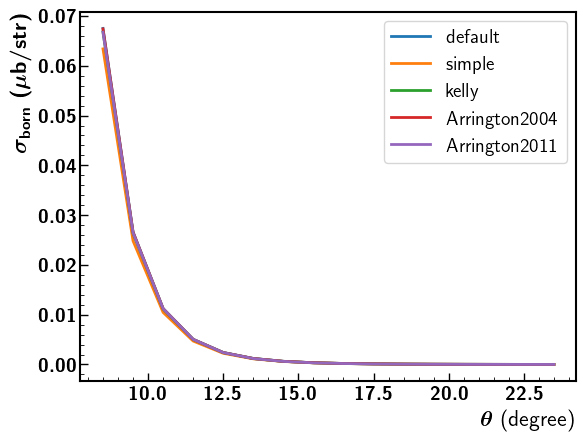

In [11]:
#theta_rc = (df_rc_8['theta_min_deg'].astype(float)+df_rc_8['theta_max_deg'].astype(float))/2
#xs = (df_rc_8['xs_mubperstr'].astype(float))
#plt.plot(theta_rc,xs,label='RC')

theta_born = (df_born_8['theta_min_deg'].astype(float)+df_born_8['theta_max_deg'].astype(float))/2
xs_born = (df_born_8['xs_mubperstr'].astype(float))
plt.plot(theta_born,xs_born,label='default')

xs_simple_born = (df_born_simple_8['xs_mubperstr'].astype(float))
plt.plot(theta_born,xs_simple_born,label='simple')

xs_kelly_born = (df_born_kelly_8['xs_mubperstr'].astype(float))
plt.plot(theta_born,xs_kelly_born,label='kelly')

xs_Arrington2004_born = (df_born_Arrington2004_8['xs_mubperstr'].astype(float))
plt.plot(theta_born,xs_Arrington2004_born,label='Arrington2004')

xs_Arrington2011_born = (df_born_Arrington2011_8['xs_mubperstr'].astype(float))
plt.plot(theta_born,xs_Arrington2011_born,label='Arrington2011')

plt.legend()
plt.xlabel(r'$\theta$ (degree)')
plt.ylabel(r'$\sigma_{born}$ $(\mu b/str)$')
plt.savefig('../Proposals/Unpol_proposal/elastic_ep/Xs_theta_full_sys.pdf')

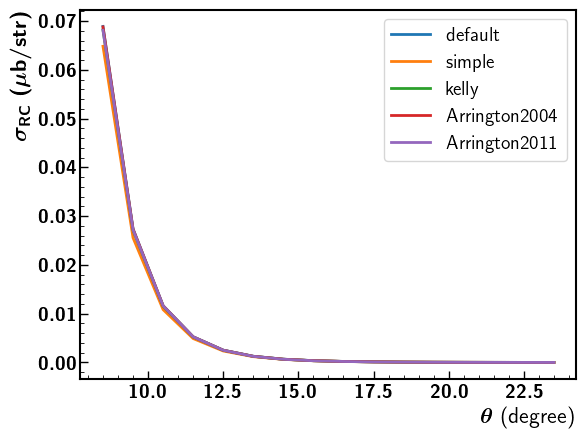

In [12]:
theta_rc = (df_rc_8['theta_min_deg'].astype(float)+df_rc_8['theta_max_deg'].astype(float))/2
xs = (df_rc_8['xs_mubperstr'].astype(float))
plt.plot(theta_rc,xs,label='default')

xs_simple_rc = (df_rc_simple_8['xs_mubperstr'].astype(float))
plt.plot(theta_rc,xs_simple_rc,label='simple')

xs_kelly_rc = (df_rc_kelly_8['xs_mubperstr'].astype(float))
plt.plot(theta_rc,xs_kelly_rc,label='kelly')

xs_Arrington2004_rc = (df_rc_Arrington2004_8['xs_mubperstr'].astype(float))
plt.plot(theta_rc,xs_Arrington2004_rc,label='Arrington2004')

xs_Arrington2011_rc = (df_rc_Arrington2011_8['xs_mubperstr'].astype(float))
plt.plot(theta_rc,xs_Arrington2011_rc,label='Arrington2011')

plt.legend()
plt.xlabel(r'$\theta$ (degree)')
plt.ylabel(r'$\sigma_{RC}$ $(\mu b/str)$')
plt.savefig('../Proposals/Unpol_proposal/elastic_ep/XsRC_theta_full_sys.pdf')

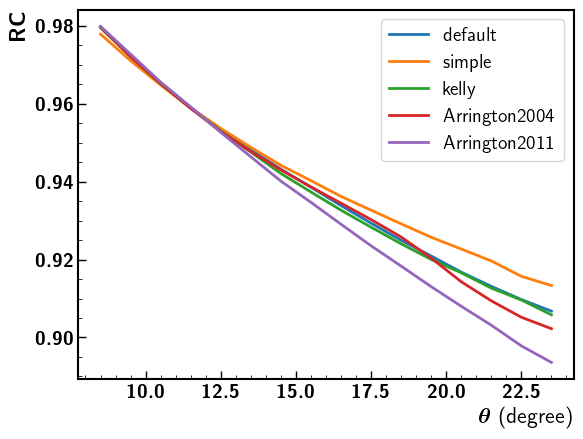

In [13]:
theta_rc = (df_rc_8['theta_min_deg'].astype(float)+df_rc_8['theta_max_deg'].astype(float))/2
xs = (df_rc_8['xs_mubperstr'].astype(float))
plt.plot(theta_rc,xs_born/xs,label='default')

xs_simple_rc = (df_rc_simple_8['xs_mubperstr'].astype(float))
plt.plot(theta_rc,xs_simple_born/xs_simple_rc,label='simple')

xs_kelly_rc = (df_rc_kelly_8['xs_mubperstr'].astype(float))
plt.plot(theta_rc,xs_kelly_born/xs_kelly_rc,label='kelly')

xs_Arrington2004_rc = (df_rc_Arrington2004_8['xs_mubperstr'].astype(float))
plt.plot(theta_rc,xs_Arrington2004_born/xs_Arrington2004_rc,label='Arrington2004')

xs_Arrington2011_rc = (df_rc_Arrington2011_8['xs_mubperstr'].astype(float))
plt.plot(theta_rc,xs_Arrington2011_born/xs_Arrington2011_rc,label='Arrington2011')

plt.legend()
plt.xlabel(r'$\theta$ (degree)')
plt.ylabel(r'$RC$')
plt.savefig('../Proposals/Unpol_proposal/elastic_ep/RC_theta_full_sys.pdf')

Text(0, 1, 'rate (kHz)')

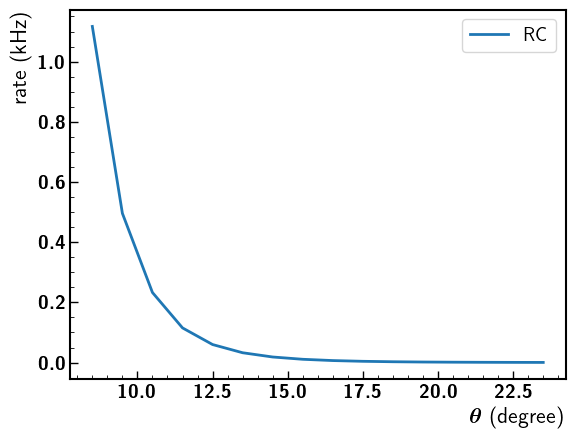

In [14]:
theta_rc = (df_rc_8['theta_min_deg'].astype(float)+df_rc_8['theta_max_deg'].astype(float))/2
xs = (df_rc_8['xs_mubperstr'].astype(float))*(df_rc_8['angle_ster'].astype(float))*1e3
plt.plot(theta_rc,xs,label='RC')



plt.legend()
plt.xlabel(r'$\theta$ (degree)')
plt.ylabel(r'rate (kHz)')
#plt.savefig('../Proposals/Unpol_proposal/elastic_ep/Rate_theta_full.pdf')



(7.0, 15.0)

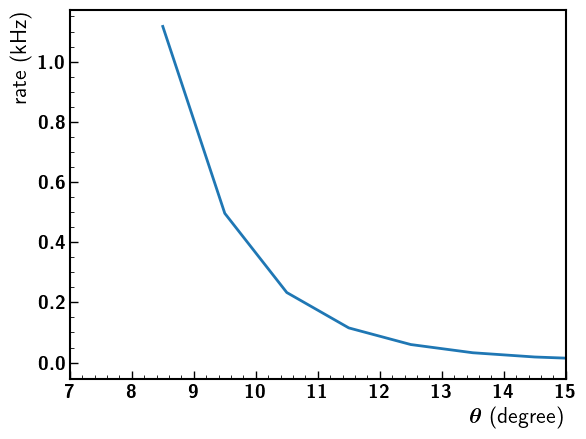

In [15]:
theta_rc = (df_rc_8['theta_min_deg'].astype(float)+df_rc_8['theta_max_deg'].astype(float))/2
xs = (df_rc_8['xs_mubperstr'].astype(float))*(df_rc_8['angle_ster'].astype(float))*1e3
plt.plot(theta_rc,xs)
plt.xlabel(r'$\theta$ (degree)')
plt.ylabel(r'rate (kHz)')
plt.xlim(7,15)
#plt.savefig('../Proposals/Unpol_proposal/elastic_ep/RC_rate_theta_small.pdf')